**Задание 1.**

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5.

In [2]:
# задано изначально
import numpy as np
import pandas as pd

r = np.random.RandomState(1)
s = pd.Series(r.uniform(0, 10, 100))


print(np.searchsorted(s.sort_values(), 5 + 1e-8))

51


**Задание 2.**

Имеется небольшой игрушечный DataFrame, в котором необходимо провести несколько типов фильтраций и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [3]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

df

# ваш код тут
print(df[df['возраст'] > 40])
mean_income = df['доход'].mean()
mean_reliability = df['надежность клиента (0..1)'].mean()


print(mean_income)
print(mean_reliability)

print(df[df['доход'] > mean_income])
print(df[(df['доход'] > mean_income) & (df['надежность клиента (0..1)'] < mean_reliability)])

df['важность клиента'] = df['доход'] * df['надежность клиента (0..1)']
df['возможная долгосрочность клиента'] = df['важность клиента'] * (df['возраст'].mean() - df['возраст'])
print(df)


    имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
2   Аня       41  150000                       0.87  жен
97500.0
0.7350000000000001
    имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
2   Аня       41  150000                       0.87  жен
    имя  возраст   доход  надежность клиента (0..1)  пол
0  Петя       45  100000                       0.65  муж
     имя  возраст   доход  надежность клиента (0..1)  пол  важность клиента  \
0   Петя       45  100000                       0.65  муж           65000.0   
1   Вася       26   80000                       0.74  муж           59200.0   
2    Аня       41  150000                       0.87  жен          130500.0   
3  Света       21   60000                       0.68  жен           40800.0   

   возможная долгосрочность клиента  
0                         -763750.0  
1                          429200.0  
2      

**Задание 3.**

Как объединить два DataFrame по двум столбцам так, чтобы остались только общие строки?

Объедините df1 и df2 по столбцам fruit-frukt и weight-ves.

In [4]:
df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['low', 'medium', 'high'] * 3,
                    'price': np.random.randint(0, 100, 9)})

df2 = pd.DataFrame({'frukt': ['apple', 'banana', 'melon'] * 2,
                    'ves': ['low', 'high'] * 3,
                    'price': np.random.randint(0, 100, 6)})

print(df1)
print(df2)

res = pd.merge(df1, df2, how='inner', left_on=['fruit', 'weight'], right_on=['frukt', 'ves'], suffixes=['_left', '_right'])
print(res)

    fruit  weight  price
0   apple     low     38
1  banana  medium     57
2  orange    high     10
3   apple     low     93
4  banana  medium     97
5  orange    high     67
6   apple     low     51
7  banana  medium     21
8  orange    high     81
    frukt   ves  price
0   apple   low     86
1  banana  high     44
2   melon   low      3
3   apple  high      9
4  banana   low      5
5   melon  high     32
   fruit weight  price_left  frukt  ves  price_right
0  apple    low          38  apple  low           86
1  apple    low          93  apple  low           86
2  apple    low          51  apple  low           86


**Задание 4.** 
Сгенерировать и добавить номера телефонов следующего вида +7(000)000 00 00 в таблицу



In [7]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25},
     {"Name": "Алексей", "Age": 20}]

df = pd.DataFrame(d)


import random

def get_phone():
     tel = '{0:=010}'.format(random.randint(0000000000, 9999999999))
     return f"+7({tel[:3]}){tel[3:6]} {tel[6:8]} {tel[8:10]}"

df['Phone'] = [get_phone() for i in range(0, len(df))]

print(df)

      Name  Age             Phone
0   Виктор   18  +7(072)445 31 43
1    Мария   21  +7(041)038 27 21
2     Иван   19  +7(150)510 86 81
3     Иван   25  +7(641)497 55 95
4  Алексей   20  +7(829)072 01 20


# Matplotlib

[Matplotlib](https://matplotlib.org/) - базовый модуль для построения графиков в Python. Кроме matplotlib существуют и более сложные инструменты для построения графиков, мы коснёмся их в данном уроке лишь чуть-чуть. 

In [8]:
# проверяем установку модуля
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 6.9 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 7.6 MB/s eta 0:00:00
     -------------------------------------- 163.6/163.6 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 11.3 MB/s eta 0:00:00
     -------------------------------------- 55.3/55.3 kB 714.6 kB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
#классический вариант подключения модуля
#Модуль pyplot — это коллекция функций в стиле команд, которая позволяет использовать matplotlib почти так же, как MATLAB.
import matplotlib.pyplot as plt

#### Небольшое отвлечение в сторону

В google colab по-умолчанию графики отображаются встроенными в ноутбук. Однако в других случаях это происходит не всегда. Проверить, встроены ли графики в ноутбук или отделены можно с помощью команды 

```
matplotlib.get_backend()
```
Сделать так, чтобы они были встроены с помощью


```
%matplotlib inline
```
В большинстве случаев лучше по умолчанию использовать эту команду, чтобы не было проблем с переносом кода на другие устройства и платформы.




In [10]:
import matplotlib
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

In [11]:
%matplotlib inline

## Первое знакомство

Просто график можно пострость с помощью метода `plot(x, y)`. 

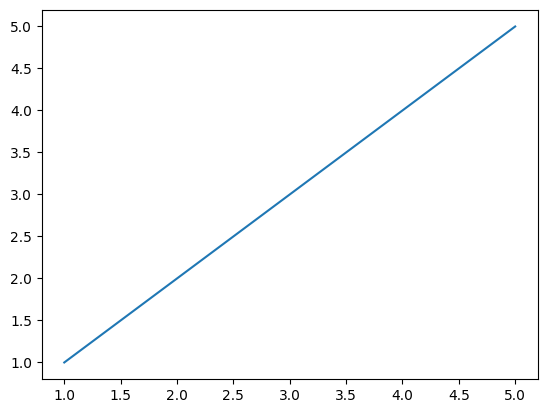

In [12]:
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])
# если не добавить команду show(), то кроме самого графика, в ноутбуке отборазится ещё и название используемого объекта.
plt.show()

In [13]:
import numpy as np

In [14]:
# то же самое, но используем команду numpy для создания дискретного набора от 0 до 5 (50 точек)
x = np.linspace(0, 5, 50)
y = x

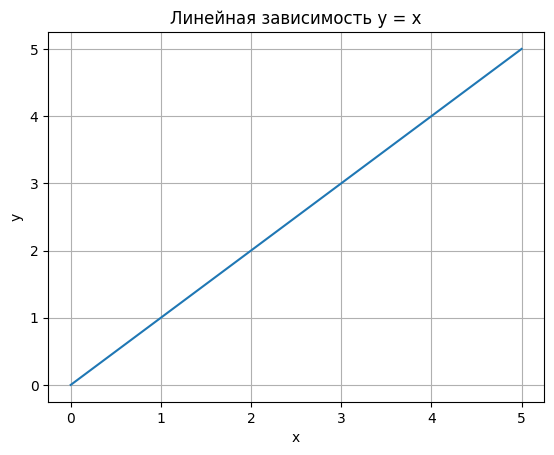

In [15]:
plt.title("Линейная зависимость y = x") # подпись для заголовка
plt.xlabel("x") # подись для оси х
plt.ylabel("y") # подись для оси y
plt.grid()      # включение отображение крупной сетки
plt.plot(x, y)  
plt.show()

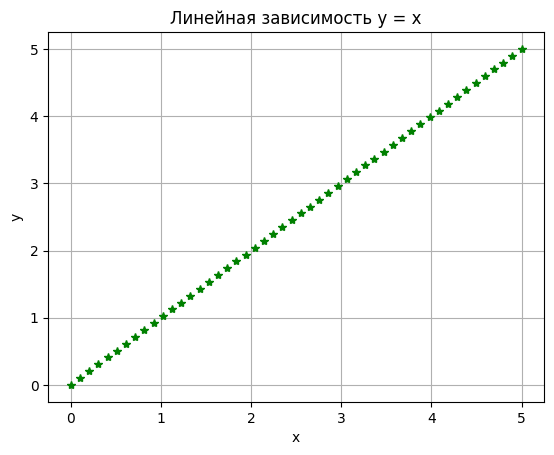

In [16]:
plt.title("Линейная зависимость y = x") 
plt.xlabel("x") 
plt.ylabel("y") 
plt.grid()
# можно менять цвет и формат вывода графика, вариантов много      
plt.plot(x, y, "g*")  
plt.show()

## Несколько графиков 

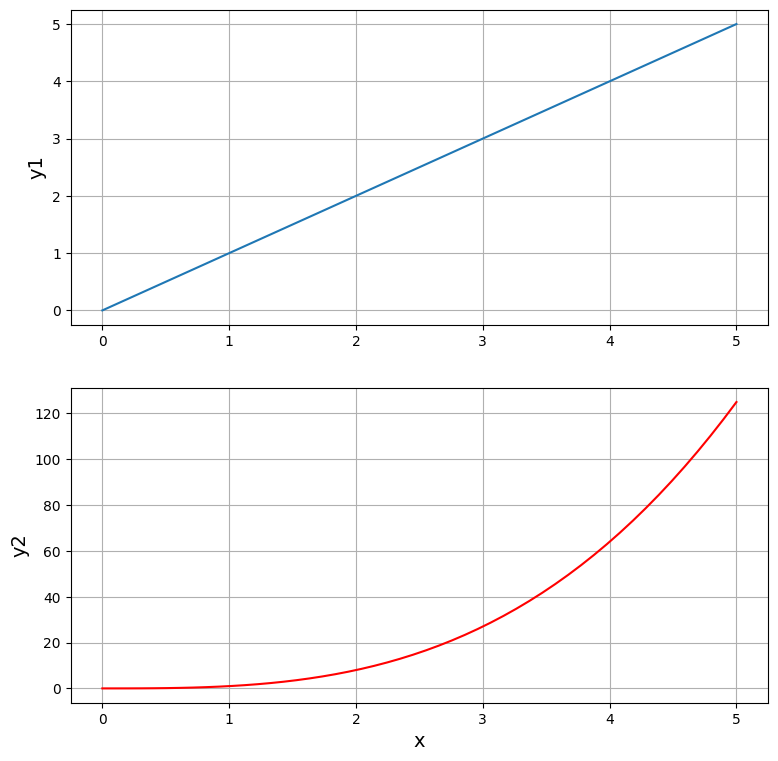

In [17]:
y1 = x
y2 = [i**3 for i in x]

# Построение графиков
plt.figure(figsize=(9, 9)) #создаём фигуру и задаём её размеры
plt.subplot(2, 1, 1) #выбираем нужную фигуру
plt.plot(x, y1)               
plt.ylabel("y1", fontsize=14)
plt.grid(True)               
plt.subplot(2, 1, 2) #выбираем следующую фигуру
plt.plot(x, y2, c='r')               
plt.xlabel("x", fontsize=14)  
plt.ylabel("y2", fontsize=14) 
plt.grid(True)               

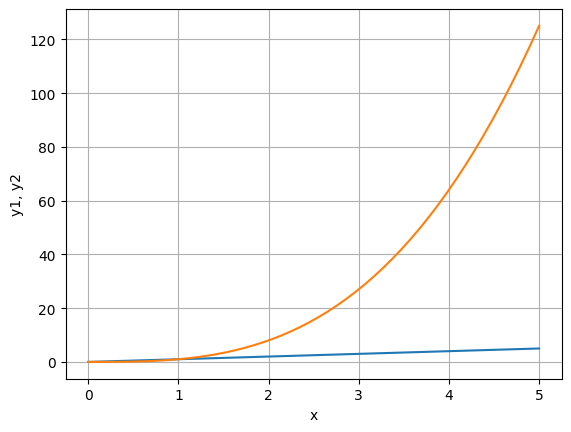

In [18]:
# размер меньше, чем у фигур выше
# оба графика на одной фигуре
plt.xlabel("x")        
plt.ylabel("y1, y2")    
plt.grid()              
plt.plot(x, y1, x, y2) # цвета графиков будут задавать последовательно в стандартном порядке
plt.show()

На всякий случай мы подобрали картинку, которая показывает разные параметры фигуры в библиотеке matplotlib

![Разные параметры диаграммы.py](https://drive.google.com/uc?id=1Y1dDMy991toCzuLIb-tctWSs18FGzMfZ) 

## Диаграмма разброса точек

Следующий популярный вид графика - график разброса точек. При построении этого графика используем другой подход, нежели использовали раннее. Поработаем с объектами. 

Заметим, что получить график разброса точек можно и из обычного графка plot. Но при профессиональном использовании scatter даёт больше возможностей. 

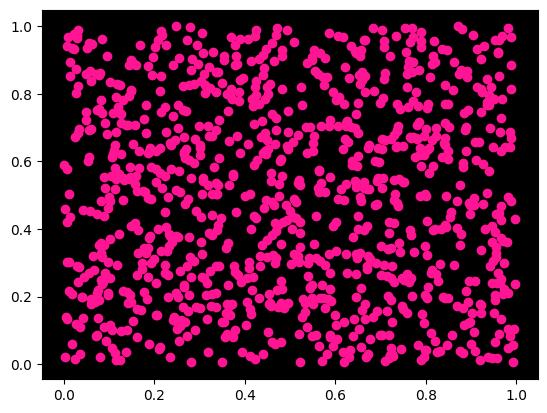

In [21]:
x = np.random.rand(1000)    #  x - координаты точек
y = np.random.rand(1000)    #  y - координаты точек

fig, ax = plt.subplots()

ax.scatter(x, y, c = 'deeppink')    #  цвет точек


ax.set_facecolor('black')     #  цвет области Axes

plt.show()

Построим чуть более сложный вариант, на котором рзаместим данные разного типа.

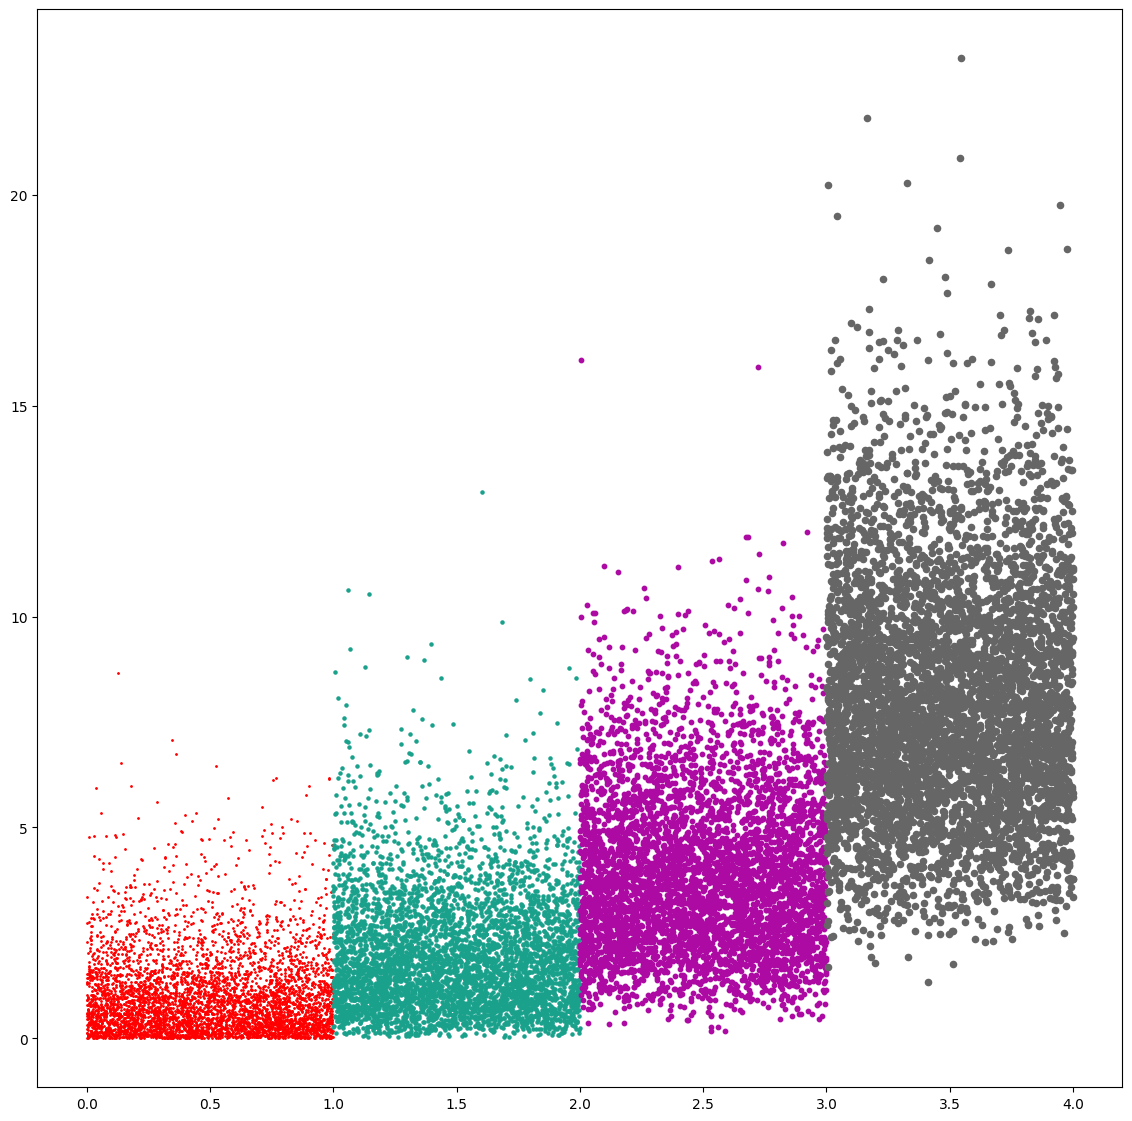

In [22]:
x = np.random.rand(5000)
# создадим четыре варианта данных в случайном диапазоне, используя гамма-распределение (или любое другое)
# количество точек - 5000
y1 = np.random.gamma(1, size = 5000)
y2 = np.random.gamma(2, size = 5000)
y3 = np.random.gamma(4, size = 5000)
y4 = np.random.gamma(8, size = 5000)

fig, ax = plt.subplots()

# s определяет размер точек
# ключ цвета из {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}:
ax.scatter(x, y1, c = 'r', s = 1)
# RGB:
ax.scatter(x + 1, y2, c = [[0.1, 0.63, 0.55]], s = 5)
# hex RGB:
ax.scatter(x + 2, y3, c = '#ad09a3', s = 10)
# уровень серого в интервале [0, 1]:
ax.scatter(x + 3, y4, c = ['0.4'], s = 20)

#  Увеличим размер графика:
fig.set_figwidth(14)
fig.set_figheight(14)

plt.show()

## Гистограммы

Крайне популярный вариант диаграмм, который показывает сколько объектов (в общечеловеческом смысле) относятся к тому или иному типу. Иначе говоря, распределение объектов по разным типам или классам.

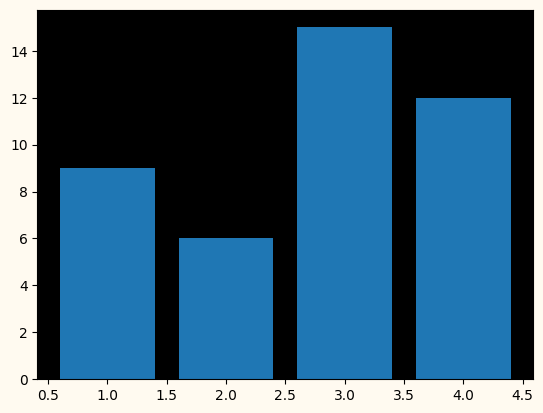

In [23]:
x = np.arange(1, 5)
y = np.random.randint(1, 20, size = 4)

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_facecolor('black') # обратите внимание, что теперь можно явно видеть часть figure и часть axes на графике.
fig.set_facecolor('floralwhite')

plt.show()


Можно создавать несколько диаграм на разных частях фигуры. Для этого нужно использовать команду subplots. 

В случае с гистограммами это крайне важно, так как иначе они начинают перекрывать друг друга. 

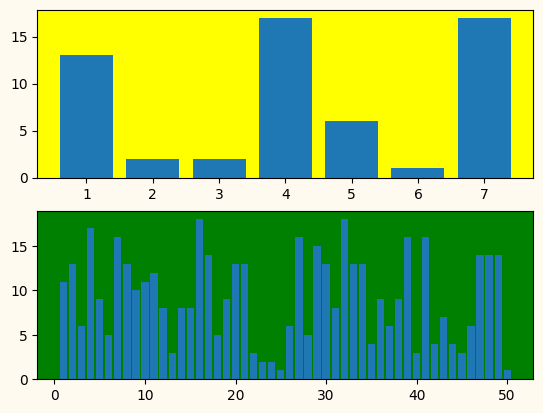

In [24]:
x1 = np.arange(1, 8)
y1 = np.random.randint(1, 20, size = 7)
x2 = np.arange(1, 51)
y2 = np.random.randint(1, 20, size = 50)

fig, axes = plt.subplots(2, 1)

axes[0].bar(x1, y1)
axes[1].bar(x2, y2)

axes[0].set_facecolor('yellow')
axes[1].set_facecolor('green')
fig.set_facecolor('floralwhite')

plt.show()

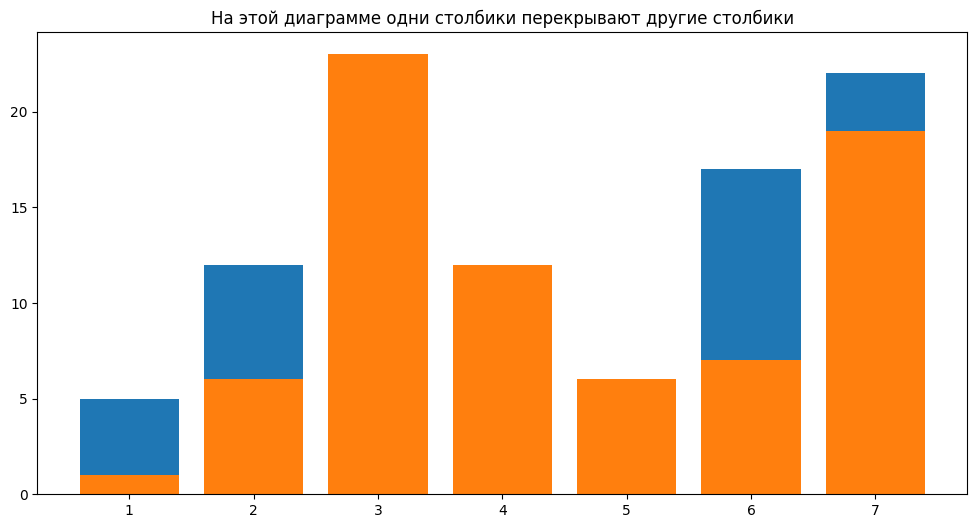

In [25]:
x = np.arange(1, 8)
y1 = np.random.randint(1, 25, size = 7)
y2 = np.random.randint(1, 25, size = 7)

fig, ax = plt.subplots()

ax.bar(x, y1)
ax.bar(x, y2)

fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

ax.set_title('На этой диаграмме одни столбики перекрывают другие столбики')

plt.show()

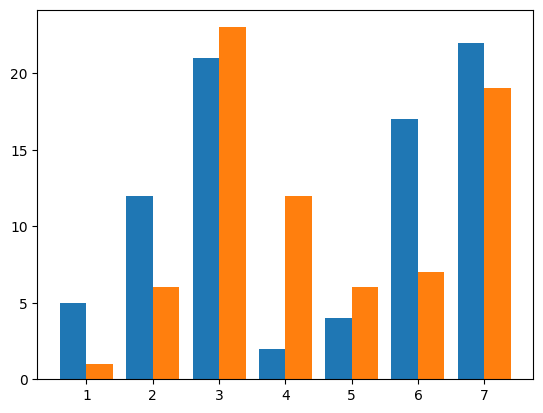

In [26]:
fig, ax = plt.subplots()

ax.bar(x-0.2, y1, width = 0.4) #небольшой лайфхак, сдвигаем позицию X и влево 
# или вправо относительно центра расположения столбика, вместе с коррекцией 
# ширины столбика
ax.bar(x+0.2, y2, width = 0.4)

plt.show()

## Несколько других видов графиков

### Коррелограмма 

Данный вид графика используется для того, что визуализировать наличие корелляционной связи между различными рядами данных. Нам потребуется использовать графики такого типа. Для их использования необходимо подключить другой модуль seaborn. 

In [27]:
import seaborn as sns
import pandas as pd

ModuleNotFoundError: No module named 'seaborn'

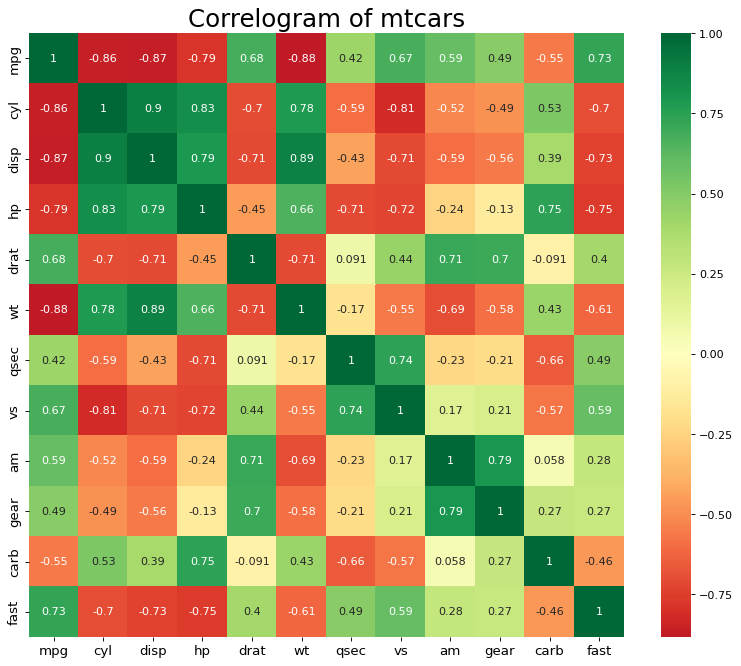

In [170]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv") 
# обратите внимание, pandas способен считывать данные из файла по ссылке

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, 
            yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Парые зависимости

Ещё один функциональный вариант графиков, который пригодится при работе с наборами данных из модуля sns. Визуализирует разброс каждой пары данных. 

<Figure size 800x640 with 0 Axes>

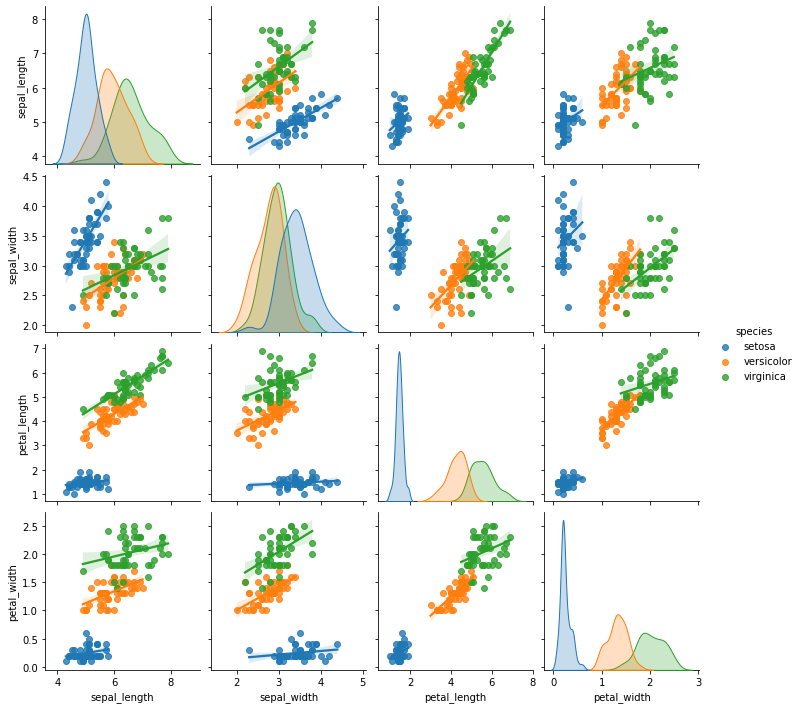

In [171]:
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()

***Задание 1***

Скачать файл по ссылке https://disk.yandex.ru/d/ZeDbB3rqhIr1NA , считать через pandas. Получить список уникальных значений - стран в колонке "Country", отфильтровать и получить данные только по выпускникам колледжа. Убрать строки с пропусками в данных (NaN). (В случае ошибок типов можете конвертировать колонки к нужным типам через .astype(str) или .astype(int). Подсчитать макс значение, среднее и СКО для числа детей (household_children) в отфильтрованных данных.

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('H1N1_Flu_Vaccines.csv') # КОЛОНКИ Country ТУТ НЕТ!!!

data = data.dropna()

data = data[data['education'] == 'College Graduate']

print(data)
print('--------------------------------------------------------')
print(data['household_children'].max(), data['household_children'].mean(), data['household_children'].std())


       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
11                11           1.0             2.0                        0.0   
15                15           1.0             1.0                        0.0   
22                22           1.0             1.0                        0.0   
34                34           1.0             1.0                        0.0   
47                47           0.0             2.0                        0.0   
...              ...           ...             ...                        ...   
26654          26654           2.0             1.0                        0.0   
26681          26681           2.0             1.0                        0.0   
26683          26683           1.0             2.0                        1.0   
26690          26690           0.0             2.0                        0.0   
26703          26703           1.0             2.0                        0.0   

       behavioral_avoidance

***Задание 2***

Скачать файл по ссылке https://disk.yandex.ru/i/uoN5eQE1qPCXCQ , считать через pandas второй лист (Olympics). Отфильтровать данные по России и золотым медалистам, построить график разброса возраст-вид_спорта. Построить линейный график на след данных - df.groupby('Year').Age.mean().dropna(). Сохранить графики в pdf. Отфильтровать изначальные данные только по летнему сезону, убрать колонку Город, создать колонку Год рождения, вычислить её через Возраст и Дату проведения, датафрейм сохранить вместе с графиками в архиве и скачать (командами, не через GUI).

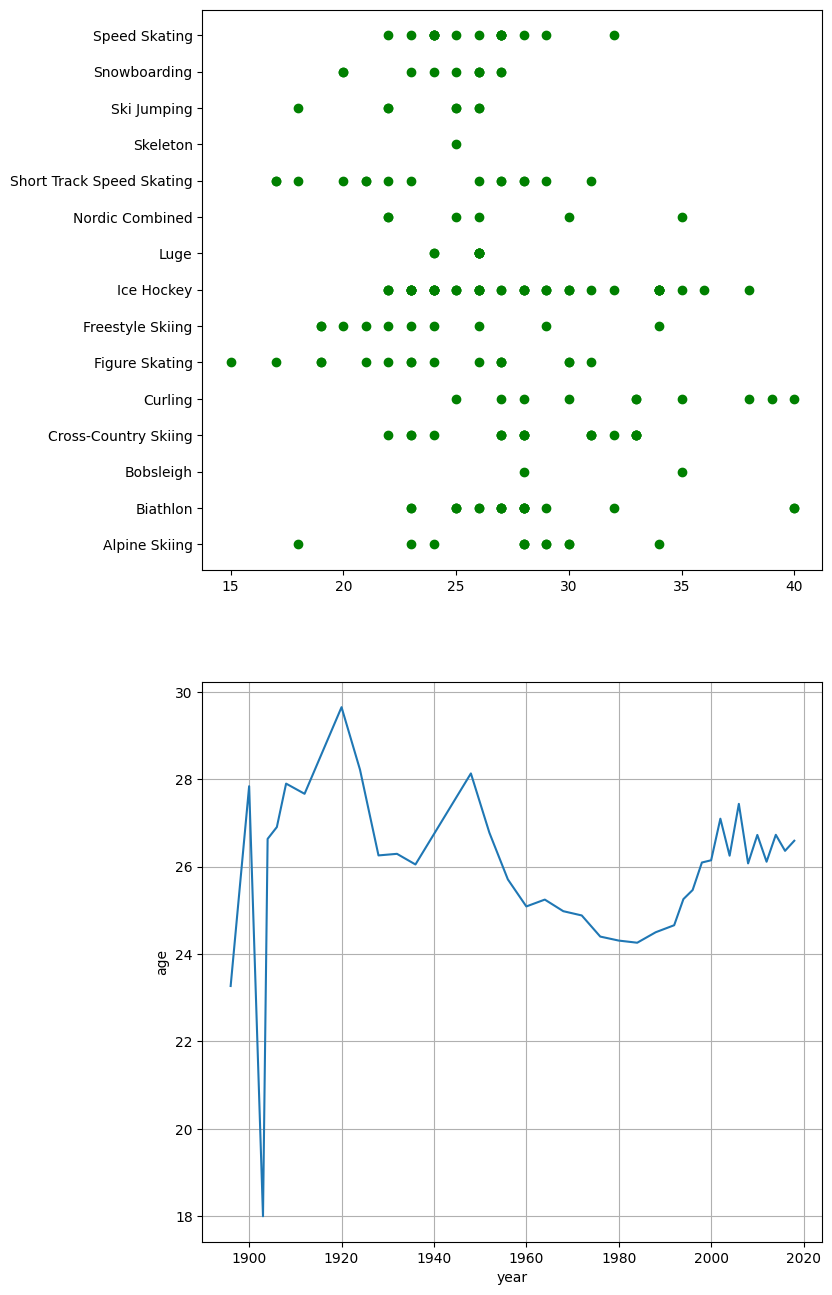

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('Olympics 2018.xlsx', sheet_name='Olympics')

#print(data)

df = data[(data['Medal'] == 'GOLD')  & (data['Country'] == 'Russia')]


fig, ax = plt.subplots(2)
fig.set_figwidth(8)
fig.set_figheight(16)

ax[0].scatter(df['Age'], df['Sport'], c='green')

linear_data = data.groupby('Year').Age.mean().dropna()
ax[1].set_xlabel('year')
ax[1].set_ylabel('age')
ax[1].grid()
ax[1].plot(linear_data)

from matplotlib.backends.backend_pdf import PdfPages

plot_pdf = PdfPages('plots.pdf')
plot_pdf.savefig(plt.gcf())
plot_pdf.close()

# Полезные ссылки

1. Большой [туториал](https://pyprog.pro/mpl/mpl_main_components.html) по matplotlib.
2. [50 различных графиков](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/) matplotlib и seaborn 